In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
from collections import OrderedDict

pd.options.display.mpl_style = 'default'


%matplotlib inline

matplotlib.rcParams.update({'font.family': "serif"})

In [40]:
noIndex = pd.DataFrame()
allIndex = pd.DataFrame()
optimizedIndex = pd.DataFrame()

noIndex = noIndex.append(pd.read_csv("results-2-phase-10mb/phase-1-no-index.csv",header=False,names=["noIndex"]),True)
allIndex = allIndex.append(pd.read_csv("results-2-phase-10mb/phase-1-all-index.csv",header=False,names=["allIndex"]),True)
optimizedIndex = optimizedIndex.append(pd.read_csv("results-2-phase-10mb/phase-1-optimized-index.csv",header=False,names=["optimizedIndex"]),True)

print(noIndex.median()[0],allIndex.median()[0],optimizedIndex.median()[0])
print(noIndex.mean()[0],allIndex.mean()[0],optimizedIndex.mean()[0])

14.563762 0.832842 14.453745
20.4152426106 6.47977231832 20.3739324555


In [41]:
# noIndex = pd.DataFrame()
# allIndex = pd.DataFrame()
# optimizedIndex = pd.DataFrame()

noIndex = noIndex.append(pd.read_csv("results-2-phase-10mb/phase-2-no-index.csv",header=False,names=["noIndex"]),True)
allIndex = allIndex.append(pd.read_csv("results-2-phase-10mb/phase-2-all-index.csv",header=False,names=["allIndex"]),True)
optimizedIndex = optimizedIndex.append(pd.read_csv("results-2-phase-10mb/phase-2-optimized-index.csv",header=False,names=["optimizedIndex"]),True)

print(noIndex.median()[0],allIndex.median()[0],optimizedIndex.median()[0])
print(noIndex.mean()[0],allIndex.mean()[0],optimizedIndex.mean()[0])


14.51669 0.8321315 13.1822835
20.385585979 6.50006966517 14.5268642513


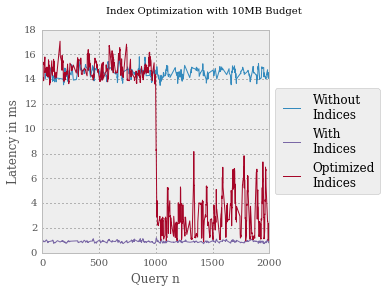

In [42]:
df = pd.DataFrame()
df['Without\nIndices'] = pd.rolling_mean(noIndex[noIndex < noIndex.quantile(q=0.90)],10).interpolate()
df['With\nIndices'] = pd.rolling_mean(allIndex[allIndex < allIndex.quantile(q=0.90)],10).interpolate()
df['Optimized\nIndices'] = pd.rolling_mean(optimizedIndex[optimizedIndex < optimizedIndex.quantile(q=0.95)], 10).interpolate()

df['t'] = range(0, len(df))
df
ax = df.plot(kind='line', rot=0, x='t')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.subplots_adjust(right=0.65)
plt.ylabel("Latency in ms")
plt.xlabel("Query n")
plt.suptitle("Index Optimization with 10MB Budget")
plt.savefig("2-phase-10mb.pdf")

In [50]:
#medians

noIndex = noIndex.append(pd.read_csv("results-2-phase-10mb/phase-1-no-index.csv",header=False,names=["noIndex"]),True)
allIndex = allIndex.append(pd.read_csv("results-2-phase-10mb/phase-1-all-index.csv",header=False,names=["allIndex"]),True)
optimizedIndex = optimizedIndex.append(pd.read_csv("results-2-phase-10mb/phase-1-optimized-index.csv",header=False,names=["optimizedIndex"]),True)

noIndex = pd.rolling_mean(noIndex[noIndex < noIndex.quantile(q=0.90)],10).interpolate()
allIndex = pd.rolling_mean(allIndex[allIndex < allIndex.quantile(q=0.90)],10).interpolate()
optimizedIndex = pd.rolling_mean(optimizedIndex[optimizedIndex < optimizedIndex.quantile(q=0.95)],10).interpolate()

print(noIndex.median()[0],allIndex.median()[0],optimizedIndex.median()[0])
print(noIndex.mean()[0],allIndex.mean()[0],optimizedIndex.mean()[0])


noIndex = pd.DataFrame()
allIndex = pd.DataFrame()
optimizedIndex = pd.DataFrame()

noIndex = noIndex.append(pd.read_csv("results-2-phase-10mb/phase-2-no-index.csv",header=False,names=["noIndex"]),True)
allIndex = allIndex.append(pd.read_csv("results-2-phase-10mb/phase-2-all-index.csv",header=False,names=["allIndex"]),True)
optimizedIndex = optimizedIndex.append(pd.read_csv("results-2-phase-10mb/phase-2-optimized-index.csv",header=False,names=["optimizedIndex"]),True)

noIndex = pd.rolling_mean(noIndex[noIndex < noIndex.quantile(q=0.90)],10).interpolate()
allIndex = pd.rolling_mean(allIndex[allIndex < allIndex.quantile(q=0.90)],10).interpolate()
optimizedIndex = pd.rolling_mean(optimizedIndex[optimizedIndex < optimizedIndex.quantile(q=0.95)],10).interpolate()

print(noIndex.median()[0],allIndex.median()[0],optimizedIndex.median()[0])
print(noIndex.mean()[0],allIndex.mean()[0],optimizedIndex.mean()[0])

14.3140755645 0.856033372857 13.62397905
14.3421672609 0.870558921422 8.3787065352
14.4998433923 0.899203432759 2.6667821
14.4900257283 0.904510979481 2.93599418318


In [51]:
#medians

noIndex = noIndex.append(pd.read_csv("results-2-phase-20mb/phase-1-no-index.csv",header=False,names=["noIndex"]),True)
allIndex = allIndex.append(pd.read_csv("results-2-phase-20mb/phase-1-all-index.csv",header=False,names=["allIndex"]),True)
optimizedIndex = optimizedIndex.append(pd.read_csv("results-2-phase-20mb/phase-1-optimized-index.csv",header=False,names=["optimizedIndex"]),True)

noIndex = pd.rolling_mean(noIndex[noIndex < noIndex.quantile(q=0.90)],10).interpolate()
allIndex = pd.rolling_mean(allIndex[allIndex < allIndex.quantile(q=0.90)],10).interpolate()
optimizedIndex = pd.rolling_mean(optimizedIndex[optimizedIndex < optimizedIndex.quantile(q=0.94)],10).interpolate()

print(noIndex.median()[0],allIndex.median()[0],optimizedIndex.median()[0])
print(noIndex.mean()[0],allIndex.mean()[0],optimizedIndex.mean()[0])


noIndex = pd.DataFrame()
allIndex = pd.DataFrame()
optimizedIndex = pd.DataFrame()

noIndex = noIndex.append(pd.read_csv("results-2-phase-20mb/phase-2-no-index.csv",header=False,names=["noIndex"]),True)
allIndex = allIndex.append(pd.read_csv("results-2-phase-20mb/phase-2-all-index.csv",header=False,names=["allIndex"]),True)
optimizedIndex = optimizedIndex.append(pd.read_csv("results-2-phase-20mb/phase-2-optimized-index.csv",header=False,names=["optimizedIndex"]),True)

noIndex = pd.rolling_mean(noIndex[noIndex < noIndex.quantile(q=0.90)],10).interpolate()
allIndex = pd.rolling_mean(allIndex[allIndex < allIndex.quantile(q=0.90)],10).interpolate()
optimizedIndex = pd.rolling_mean(optimizedIndex[optimizedIndex < optimizedIndex.quantile(q=0.94)],10).interpolate()

print(noIndex.median()[0],allIndex.median()[0],optimizedIndex.median()[0])
print(noIndex.mean()[0],allIndex.mean()[0],optimizedIndex.mean()[0])

14.3340493872 0.862599508902 10.8139251954
14.3281555429 0.86967960213 8.7747497302
14.6587252429 0.90886391 1.74046296118
14.6466519238 0.913965026518 1.9101066428


In [53]:
#medians

noIndex = noIndex.append(pd.read_csv("results-4-phase/phase-1-no-index.csv",header=False,names=["noIndex"]),True)
allIndex = allIndex.append(pd.read_csv("results-4-phase/phase-1-all-index.csv",header=False,names=["allIndex"]),True)
optimizedIndex = optimizedIndex.append(pd.read_csv("results-4-phase/phase-1-optimized-index.csv",header=False,names=["optimizedIndex"]),True)

noIndex = pd.rolling_mean(noIndex[noIndex < noIndex.quantile(q=0.90)],10).interpolate()
allIndex = pd.rolling_mean(allIndex[allIndex < allIndex.quantile(q=0.90)],10).interpolate()
optimizedIndex = pd.rolling_mean(optimizedIndex[optimizedIndex < optimizedIndex.quantile(q=0.94)],10).interpolate()

print(noIndex.mean()[0],allIndex.mean()[0],optimizedIndex.mean()[0])


noIndex = pd.DataFrame()
allIndex = pd.DataFrame()
optimizedIndex = pd.DataFrame()

noIndex = noIndex.append(pd.read_csv("results-4-phase/phase-2-no-index.csv",header=False,names=["noIndex"]),True)
allIndex = allIndex.append(pd.read_csv("results-4-phase/phase-2-all-index.csv",header=False,names=["allIndex"]),True)
optimizedIndex = optimizedIndex.append(pd.read_csv("results-4-phase/phase-2-optimized-index.csv",header=False,names=["optimizedIndex"]),True)

noIndex = pd.rolling_mean(noIndex[noIndex < noIndex.quantile(q=0.90)],10).interpolate()
allIndex = pd.rolling_mean(allIndex[allIndex < allIndex.quantile(q=0.90)],10).interpolate()
optimizedIndex = pd.rolling_mean(optimizedIndex[optimizedIndex < optimizedIndex.quantile(q=0.94)],10).interpolate()

print(noIndex.mean()[0],allIndex.mean()[0],optimizedIndex.mean()[0])

noIndex = pd.DataFrame()
allIndex = pd.DataFrame()
optimizedIndex = pd.DataFrame()

noIndex = noIndex.append(pd.read_csv("results-4-phase/phase-3-no-index.csv",header=False,names=["noIndex"]),True)
allIndex = allIndex.append(pd.read_csv("results-4-phase/phase-3-all-index.csv",header=False,names=["allIndex"]),True)
optimizedIndex = optimizedIndex.append(pd.read_csv("results-4-phase/phase-3-optimized-index.csv",header=False,names=["optimizedIndex"]),True)

noIndex = pd.rolling_mean(noIndex[noIndex < noIndex.quantile(q=0.90)],10).interpolate()
allIndex = pd.rolling_mean(allIndex[allIndex < allIndex.quantile(q=0.90)],10).interpolate()
optimizedIndex = pd.rolling_mean(optimizedIndex[optimizedIndex < optimizedIndex.quantile(q=0.94)],10).interpolate()

print(noIndex.mean()[0],allIndex.mean()[0],optimizedIndex.mean()[0])

noIndex = pd.DataFrame()
allIndex = pd.DataFrame()
optimizedIndex = pd.DataFrame()

noIndex = noIndex.append(pd.read_csv("results-4-phase/phase-4-no-index.csv",header=False,names=["noIndex"]),True)
allIndex = allIndex.append(pd.read_csv("results-4-phase/phase-4-all-index.csv",header=False,names=["allIndex"]),True)
optimizedIndex = optimizedIndex.append(pd.read_csv("results-4-phase/phase-2-optimized-index.csv",header=False,names=["optimizedIndex"]),True)

noIndex = pd.rolling_mean(noIndex[noIndex < noIndex.quantile(q=0.90)],10).interpolate()
allIndex = pd.rolling_mean(allIndex[allIndex < allIndex.quantile(q=0.90)],10).interpolate()
optimizedIndex = pd.rolling_mean(optimizedIndex[optimizedIndex < optimizedIndex.quantile(q=0.94)],10).interpolate()

print(noIndex.mean()[0],allIndex.mean()[0],optimizedIndex.mean()[0])

14.4855327032 0.911863213951 9.60003896083
14.5509402664 0.919862814221 5.0811761757
14.6926239045 0.95585531259 9.86794768803
14.7129757536 0.960980245304 4.87078388168
